## Directing Customers to Subscription of Financial Advice App

A Financial Advice company is rolling out its new product App offering a free full service for 24 hrs to its customers. 
The goal is to identify what customers are __NOT__ likely to enroll after the trial so new/additional offers can be given to them.

### __EDA__

Let's start with some exploratory Data Analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser
%matplotlib inline

In [53]:
# Read the dataset
data = pd.read_csv('new_appdata10.csv')
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
# Get more insight of the data
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


The hour column is not in numerical format, therefore a conversion is required to be able to use it as a feature in our model.

In [54]:
data['hour'] = data.hour.str.slice(1, 3).astype(int)
data.hour

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

Let's remove unnecessary columns from the data:
'user', 'screen_list', 'enrolled_date', 'first_open' and 'enrolled'

In [5]:
data2 = data.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open','enrolled'])
data2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


__Make some Histograms__

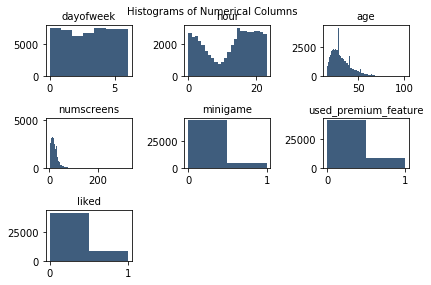

In [6]:
plt.suptitle('Histograms of Numerical Columns', fontsize = 10)

for i in range(1, data2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(data2.columns.values[i-1], fontsize = 10)
    
    vals = np.size(data2.iloc[:, i-1].unique())
    
    plt.hist(data2.iloc[:, i-1], bins= vals, color = '#3F5D7D')
    
plt.tight_layout()

__Keep Analyzying the Data. Plot correlations of features with target!__

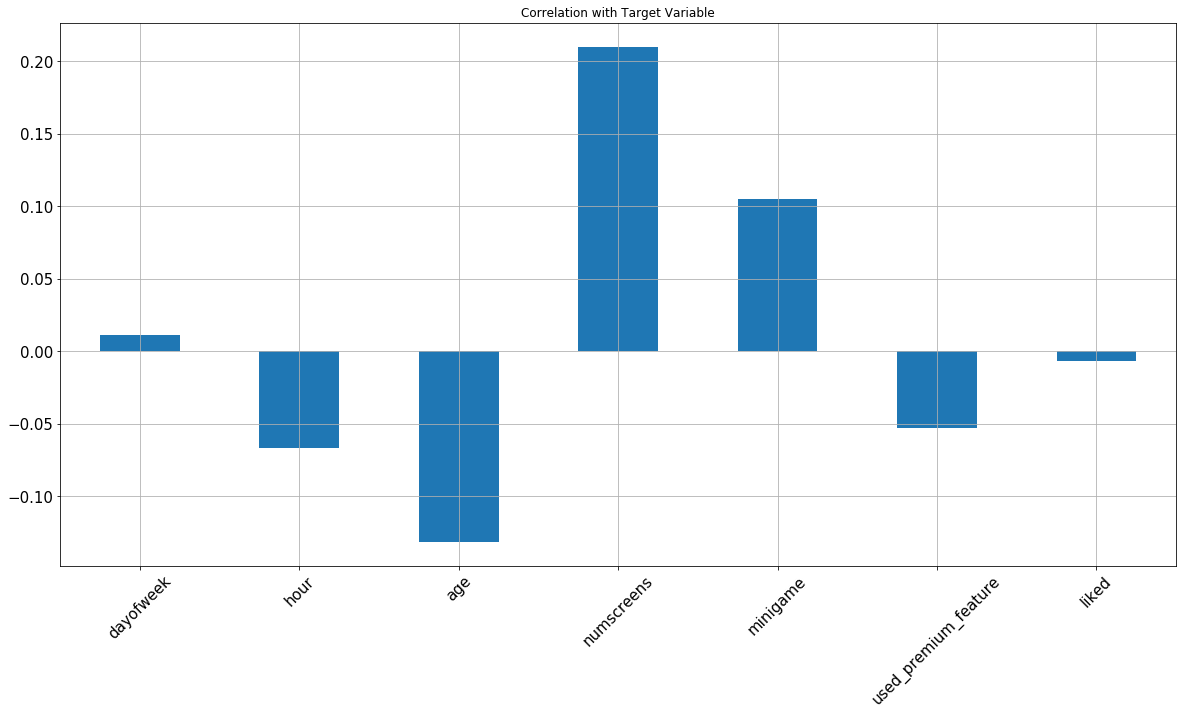

In [7]:
data2.corrwith(data.enrolled).plot.bar(figsize = (20,10), 
                                       title = 'Correlation with Target Variable',
                                      fontsize = 15, rot =45,
                                      grid = True)

Based on the correlations plot I can infere that:
- There's little correlation between dayofweek and 'liked' features with the enrollment. 
- The earliest in the day the more chances to enroll.
- Younger people are more likely to enroll.
- 'numofscreens' feature is the highest correlated with the target. The more screens you see of the product might indicate you like the product and therefore might enroll.
- 'used_premium_feature' is negatively correlated with enrollment. If a user engages with premium features more might not find the product worthy and therefore won't enroll.

__Find the correlation matrix between features__

This will be very useful because we want to make sure that the features are independent variables. Therefore if we have features highly correlated (and linearly dependant) we can start drawing conclsions about the data.

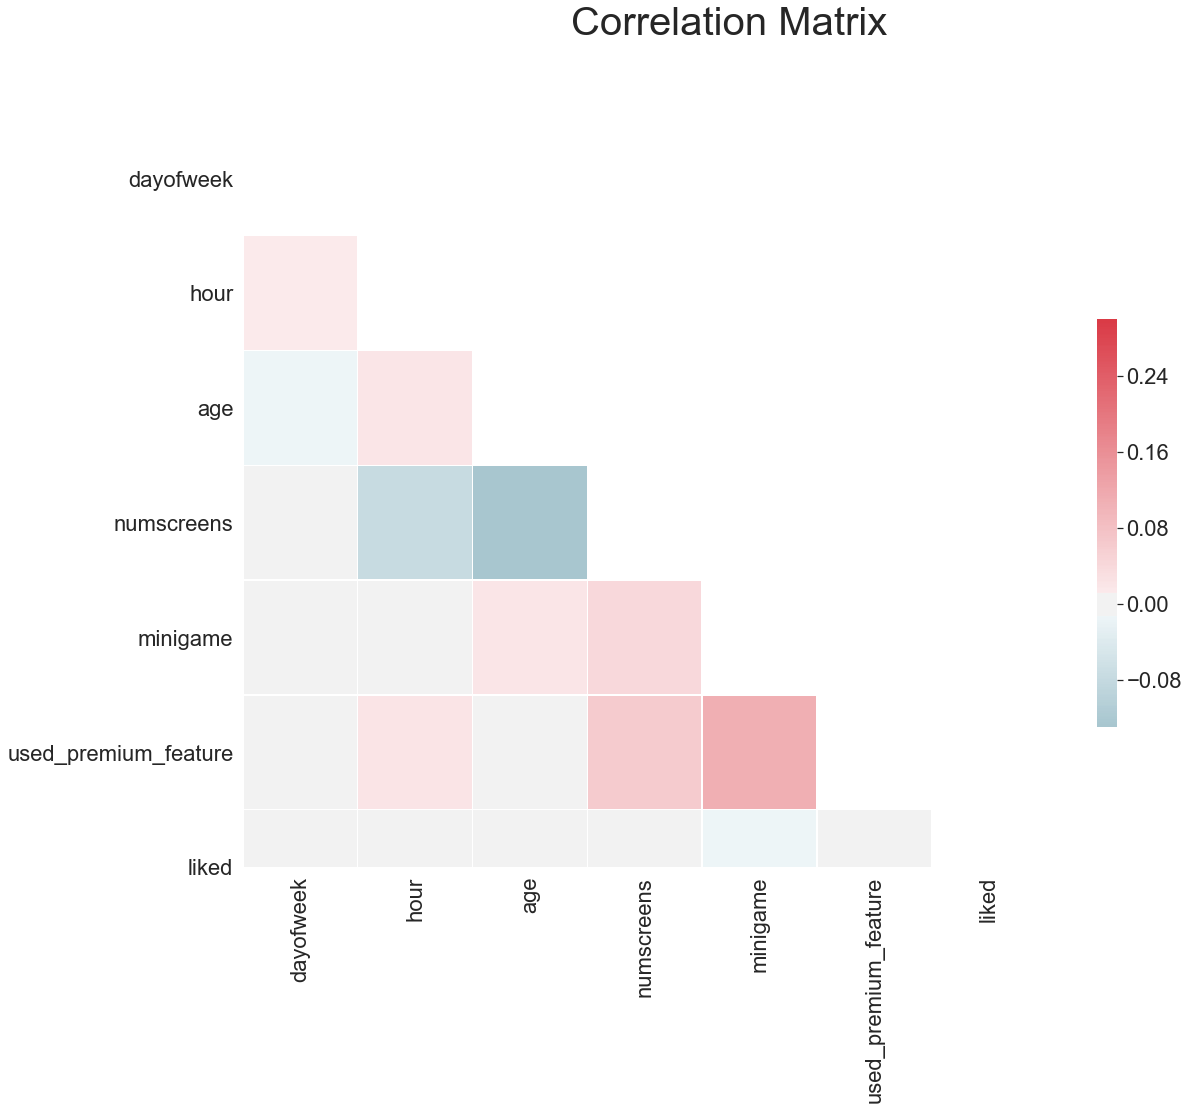

In [10]:
# Find correlation matrix
sn.set(style='white', font_scale=2)

# Compute the correlation matrix
corr = data2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (18,15))
f.suptitle('Correlation Matrix',fontsize=40)

# Generate a custom diverging colormap (optional)
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
          square=True, linewidths=0.5, cbar_kws={"shrink":0.5})

There are interesting takes from the correlation plot:
- 'dayofweek' is generally not strongly correlated to all the features in general
- 'hour' is a bit correlated with 'numofscreens' (the  later in the day the more number of screens seen) and negatively correlated with 'age' and 'used_premium_feature'.
- 'age' is strongly correlated with 'numofscreens'. The older the user the most likely to watch different screens in the app. But they're linearly independent!
- 'numscreens' is correlated with 'usedpremiumfeature', which makes sense, as if you have access to premium features you'll probably try more things within the app. Similarly between minigame and used_premium_feature.

## Feature Engineering

First, let's focus on the target

In [11]:
# What type of data we have in the original dataset -- data
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [55]:
# convert first_open (a date) into a datetime object
data['first_open']=[parser.parse(row_data) for row_data in data['first_open']]
data['first_open'].head()

0   2012-12-27 02:14:51.273
1   2012-12-02 01:16:00.905
2   2013-03-19 19:19:09.157
3   2013-07-05 16:08:46.354
4   2013-02-26 18:50:48.661
Name: first_open, dtype: datetime64[ns]

In [56]:
# Repeat for enrolled_date as well. However there's a catch here, not all cells of this column are populated
data['enrolled_date']=[parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in data['enrolled_date']]
data['enrolled_date'].head()

0                       NaT
1                       NaT
2                       NaT
3   2013-07-05 16:11:49.513
4   2013-02-26 18:56:37.841
Name: enrolled_date, dtype: datetime64[ns]

Add a new column to the dataset containing the difference between 'enrolled_date' and 'first_open' in hours and plot and histogram of this column.

In [57]:
data['difference'] = (data.enrolled_date - data.first_open).astype('timedelta64[h]')
data.difference.tail()

49995    0.0
49996    NaN
49997    NaN
49998    0.0
49999    NaN
Name: difference, dtype: float64

Text(0.5, 1.0, 'Distribution of Time-since-Enrolled')

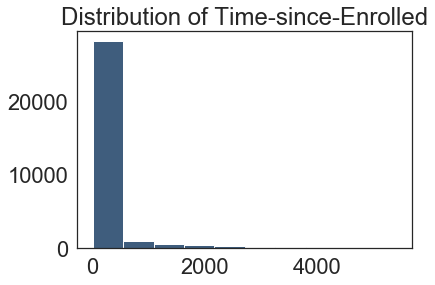

In [18]:
# Plot histogram of the difference and get rid of Nan values.
plt.hist(data['difference'].dropna(), color = '#3F5D7D')
plt.title('Distribution of Time-since-Enrolled')

As seen in the histogram, the majority of enrollments apparently occured within the first 500 hrs. Let's zoom in into the range to check if this is completely True.

Text(0.5, 1.0, 'Distribution of Time-since-Enrolled')

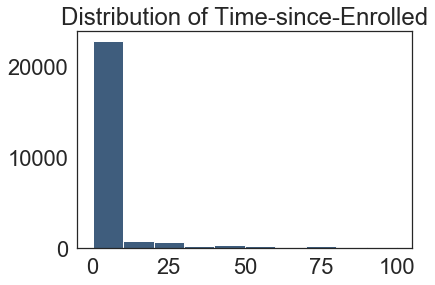

In [19]:
plt.hist(data['difference'].dropna(), color = '#3F5D7D', range=[0,100])
plt.title('Distribution of Time-since-Enrolled')

This new distribution is telling us, that in fact, the majority of enrollments occured within the first ten hours. 
So the first data processing we'll do is to get rid of entries where this difference is greater than 48 hrs (2 days)

In [58]:
data.loc[data['difference']>48] = 0

In [59]:
# Now drop the columns that are no longer needed
data = data.drop(columns=['difference', 'enrolled_date', 'first_open'])

Secondly, let's do Feature Engineering to the second dataset (the screen lists). This is another csv file that contains the screens that users visited in a 24 hr period.

In [23]:
# Read dataset
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [60]:
data['screen_list'].head()

0    idscreen,joinscreen,Cycle,product_review,ScanP...
1    joinscreen,product_review,product_review2,Scan...
2                                    Splash,Cycle,Loan
3    product_review,Home,product_review,Loan3,Finan...
4    idscreen,joinscreen,Cycle,Credit3Container,Sca...
Name: screen_list, dtype: object

In [61]:
# Add an extra comma so their count matches the number of screens
data['screen_list'] = data['screen_list'].astype(str)+','

# Create a column in dataset for each one of the top_screens that appears in the screen_list
for sc in top_screens:
    data[sc] = data.screen_list.str.contains(sc).astype(int)
    # Replace that topscreen in screen list with an empty string
    data['screen_list'] = data.screen_list.str.replace(sc+',','')

In [62]:
# Dataset with new columns for the top_screens that are within the screens seen by users.
# 'Screen_list' contains only the remaining screens that are not part of top_screens
data.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Add a column 'other' with the count of remaining screens in 'screen_list'
data['other'] = data.screen_list.str.count(',')

In [66]:
# Remove unnecessary column 'screen_list'
data = data.drop('screen_list',axis = 1)

In [67]:
# Copy to reuse dataframe up to this point
data_backup = data.copy()

In [70]:
data = data_backup.copy()

### Funnels.

There are group of screens that belong to the same category and therfore are correlated. For instance, savings1, savings 2, etc. We can group them together and count how many of them were visited by each user.

The other present funnels in the data are:
- Credit
- CC
- Loan

In [71]:
# Funnels
# They're group of screens that belong to the same category and therefore are correlated.

saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10']

# Add a new column with the count of saving screens for each user
data['savings_count'] = data[saving_screens].sum(axis=1)

# Now drop the columns for the savings screens because they're all correlated
data = data.drop(columns = saving_screens)

In [72]:
# Repeat for 'credit'
credit_screens = ['Credit1',
                 'Credit2',
                 'Credit3',
                 'Credit3Container',
                 'Credit3Dashboard']

# Add a new column with the count of credit screens for each user
data['credit_count'] = data[credit_screens].sum(axis=1)

# Now drop the columns for the credit screens because they're all correlated
data = data.drop(columns = credit_screens)


# Repeat for 'CC'
cc_screens = ['CC1',
              'CC1Category',
              'CC3']
            
# Add a new column with the count of CC screens for each user
data['cc_count'] = data[cc_screens].sum(axis=1)

# Now drop the columns for the cc screens because they're all correlated
data = data.drop(columns = cc_screens)

# Repeat for 'loans'
loan_screens = ['Loan2',
                 'Loan3',
                 'Loan4']
                 
# Add a new column with the count of loan screens for each user
data['loan_count'] = data[loan_screens].sum(axis=1)

# Now drop the columns for the loan screens because they're all correlated
data = data.drop(columns = loan_screens)

In [74]:
new_data = data.copy()
new_data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'Loan',
       'RewardsContainer', 'EditProfile', 'Finances', 'Alerts', 'Leaderboard',
       'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'savings_count', 'credit_count', 'cc_count', 'loan_count'],
      dtype='object')

In [77]:
# Save new dataset to a csv file
new_data.to_csv('clean_appdata.csv',index=False)

## Building the Model...

In [78]:
# import additional libraries
import time

# separate features from target
target = new_data['enrolled']
new_data = new_data.drop('enrolled', axis=1)

Split train and test data

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.2, random_state = 101)

In [82]:
# Create an identifier for each user and remove the column from the data sets

train_identifier = X_train['user']
X_train = X_train.drop('user', axis = 1)

test_identifier = X_test['user']
X_test = X_test.drop('user', axis=1)

### Scale the data

To not give any particular feature higher weight over the target

In [83]:
from sklearn.preprocessing import StandardScaler

# StandardScaler returns a numpy array with no index or columns.
# I'll recreate train and test data using a dataframe to keep this information
sc_X = StandardScaler()

# See reference for scaling with test/train sets
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

# Add the column names as per original sets
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

# Add the indexes from the original sets
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

# Rename
X_train = X_train2
X_test = X_test2

### Select a Classifier and train the model  (Logistic Regression)

In [84]:
# import necessary library and create classifier object
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0, penalty='l1')
# The penalty refers to the choice of penalizing features with high correlation with the target so the model is more accurate.

In [85]:
# Fit the model
classifier.fit(X_train, y_train)

C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
# Calculate predictions with test data
y_pred = classifier.predict(X_test)

### Evaluate the model

In [88]:
from sklearn.metrics import confusion_matrix, classification_report

# Find confusion matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[4054  946]
 [ 930 4070]]


In [89]:
# Find the classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      5000
           1       0.81      0.81      0.81      5000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



The evaluation reports show a decent model with precision of up 81%. In the confusion matrix we can see why this value. There were significant numbers of false positives and false negatives.

__Calculate the cross validation score for the model to make sure the results are good.__

In [90]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print('Logistic Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std()))

C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to '

Logistic Accuracy: 0.812 (+/- 0.008)


The results of this model tell us that we could predict with precision around 80% of users who will NOT likely enroll or become paid members of the app based on the data that was given for this project.

With this information, the company can focus on those users and think carefully of the offers they want to give in order to entice them to subscribe.

__Format the Results__

In [93]:
# Concatenate the predictions with the test identifier (user of test data) in axis = 1 (make them a column)
final_results = pd.concat([y_test, test_identifier], axis=1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,354413,1,1
1,230883,1,1
2,41909,0,0
3,305601,0,1
4,295675,0,0
5,348770,0,0
6,0,0,0
7,23022,0,0
8,338369,1,1
9,231507,0,0


### Use another classifier and compare results (Support Vectors Classifier)

In [94]:
from sklearn.svm import SVC

# Fit the model with the training data
svc_model = SVC()
svc_model.fit(X_train, y_train)

C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [95]:
# Find new predictions
svc_pred = svc_model.predict(X_test)

In [96]:
# Calculate the confusion matrix
print(confusion_matrix(y_test,svc_pred))

[[4179  805]
 [ 814 4202]]


In [97]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4984
           1       0.84      0.84      0.84      5016

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Using SVC I can get slightly better results for each one of the indicators (up to 84% from 81% with logistic regression). I consider it was worthy the attemp. However, if I implement a Grid search I could potentially improve these results.

**References**

When to use Standarization: https://datascience.stackexchange.com/questions/38395/standardscaler-before-and-after-splitting-data